In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
os.chdir("./data")
os.getcwd()

'C:\\Users\\sunee\\OneDrive\\Documents\\Georgia Tech\\MS Analytics\\CSE 6242\\Project\\latest\\git_gatech\\CODE\\data'

In [3]:
data = pd.read_csv('data_relationship.csv')
data

,country_id,level,factor,measure,factor_rank
0,139,weak-linear,hdi,0.00,4
1,193,mid-linear,hdi,-0.40,4
2,0,mid-linear,hdi,-0.63,2
3,96,mid-linear,hdi,0.34,3
4,148,weak-linear,hdi,-0.14,5
...,...,...,...,...,...
1444,124,weak-linear,unemployment,0.00,4
1445,161,weak-linear,unemployment,0.00,4
1446,26,strong-linear,unemployment,1.00,1
1447,83,weak-linear,unemployment,0.00,4


In [4]:
data = data.drop(['level','factor_rank'],axis=1)
data

,country_id,factor,measure
0,139,hdi,0.00
1,193,hdi,-0.40
2,0,hdi,-0.63
3,96,hdi,0.34
4,148,hdi,-0.14
...,...,...,...
1444,124,unemployment,0.00
1445,161,unemployment,0.00
1446,26,unemployment,1.00
1447,83,unemployment,0.00


In [6]:
country_id = pd.DataFrame(data.country_id.unique(),columns=['country_id'])

In [7]:
hdi = data[data['factor'] == 'hdi']
hdi = hdi.drop(['factor'],axis=1).rename(columns={'measure':'hdi'})

In [8]:
unemployment = data[data['factor'] == 'unemployment']
unemployment = unemployment.drop(['factor'],axis = 1).rename(columns={'measure':'unemployment'})

In [9]:
population = data[data['factor'] == 'population']
population = population.drop(['factor'],axis = 1).rename(columns={'measure':'population'})

In [10]:
gni = data[data['factor'] == 'gni']
gni = gni.drop(['factor'],axis = 1).rename(columns={'measure':'gni'})

In [11]:
gdp = data[data['factor'] == 'gdp']
gdp = gdp.drop(['factor'],axis = 1).rename(columns={'measure':'gdp'})

In [12]:
inflation = data[data['factor'] == 'inflation']
inflation = inflation.drop(['factor'],axis = 1).rename(columns={'measure':'inflation'})

In [13]:
infant_mortality = data[data['factor'] == 'infant_mortality']
infant_mortality = infant_mortality.drop(['factor'],axis = 1).rename(columns={'measure':'infant_mortality'})

In [14]:
Country_data = pd.merge(
    country_id,hdi,on='country_id').merge(
    unemployment,on='country_id').merge(
    population,on='country_id').merge(
    gdp,on='country_id').merge(
    gni,on='country_id').merge(
    inflation,on='country_id').merge(
    infant_mortality,on='country_id')

In [15]:
Country_data.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality
0,139,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02


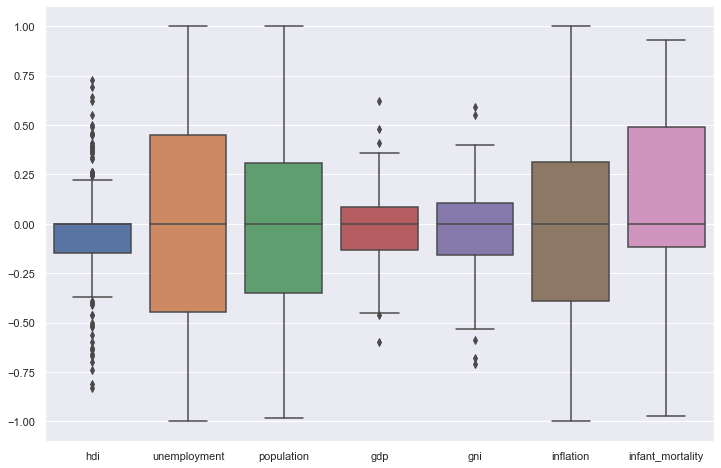

In [16]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=Country_data.drop(['country_id'],axis=1))
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
Country_data1=Country_data.drop('country_id',1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data1)

In [18]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[ 0.44098836,  0.03501844,  0.31852312,  0.51342963,  0.49734563,
         0.26942184, -0.34539139],
       [ 0.32638769,  0.24714529,  0.35998411, -0.45289244, -0.50220722,
         0.35465854, -0.34597021],
       [ 0.02217984,  0.89857502, -0.11722255,  0.0876216 ,  0.06447486,
        -0.40051225, -0.07800796],
       [-0.0638769 ,  0.3388866 , -0.07391896,  0.12082038,  0.01751101,
         0.68601399,  0.62457362],
       [-0.22846149,  0.02232277,  0.86110926,  0.05137748, -0.00660117,
        -0.27410135,  0.35774727],
       [-0.80126628,  0.11229689,  0.07983687,  0.06354637,  0.08394267,
         0.30590394, -0.48407241],
       [-0.01434702, -0.04798764, -0.04319997,  0.70874929, -0.69920072,
        -0.04353356, -0.05022689]])

In [20]:
pca.explained_variance_ratio_

array([0.35504521, 0.17633391, 0.14470656, 0.11975517, 0.10899617,
       0.07596837, 0.01919462])

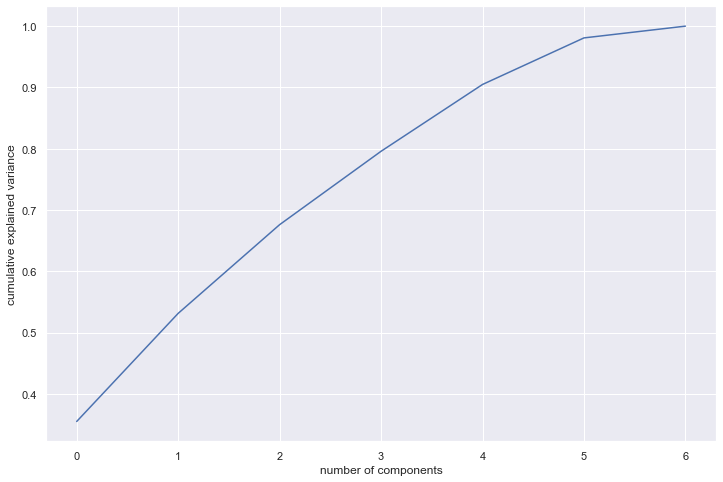

In [21]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
colnames = list(Country_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,hdi,0.440988,0.326388,0.022180,-0.063877,-0.228461
1,unemployment,0.035018,0.247145,0.898575,0.338887,0.022323
2,population,0.318523,0.359984,-0.117223,-0.073919,0.861109
3,gdp,0.513430,-0.452892,0.087622,0.120820,0.051377
4,gni,0.497346,-0.502207,0.064475,0.017511,-0.006601
5,inflation,0.269422,0.354659,-0.400512,0.686014,-0.274101
6,infant_mortality,-0.345391,-0.345970,-0.078008,0.624574,0.357747


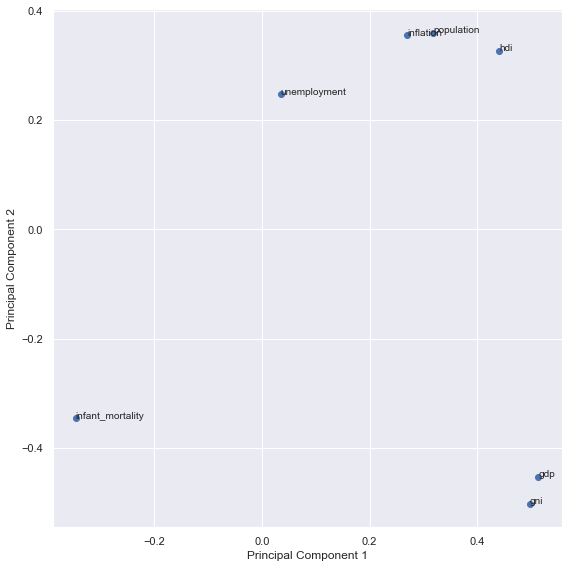

In [23]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [24]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)
df_pca = pca_final.fit_transform(Country_scaled)
df_pca.shape

(207, 5)

In [25]:
pc = np.transpose(df_pca)

In [26]:
corrmat = np.corrcoef(pc)

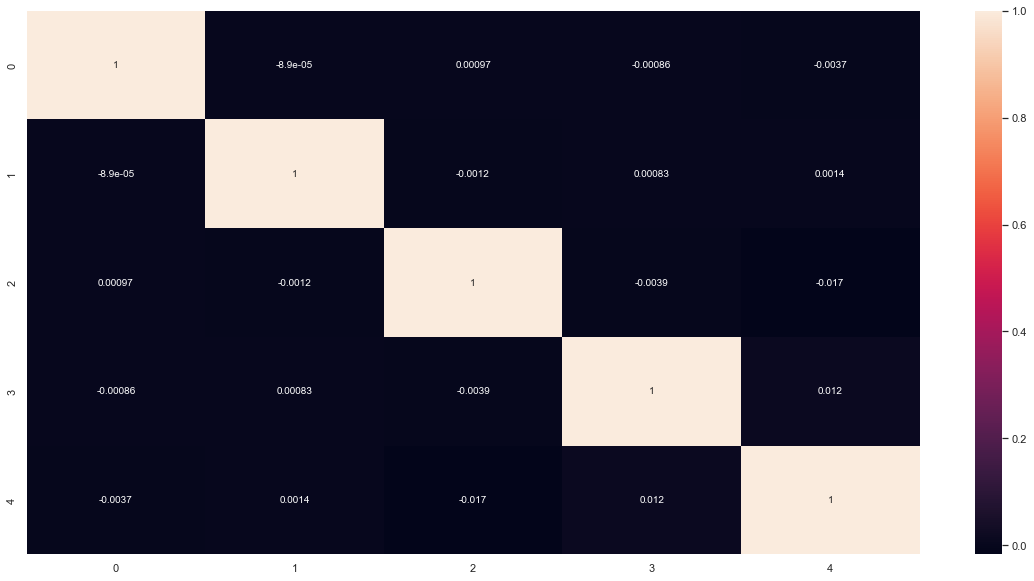

In [27]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [28]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

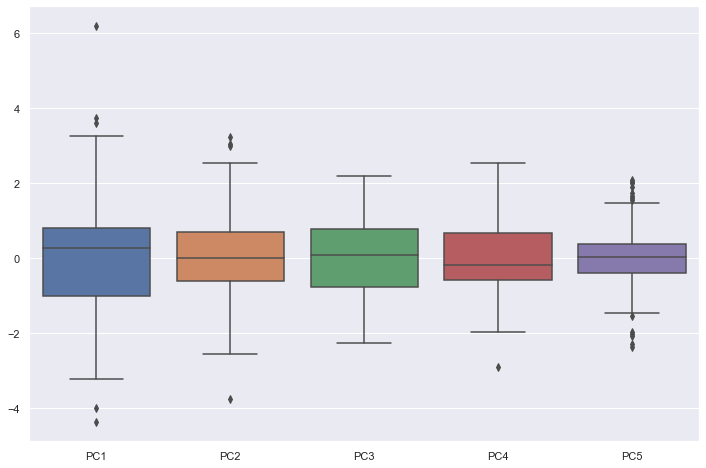

In [29]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [30]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,0.272965,0.013841,0.069570,-0.185358,0.018562
1,-2.187540,-1.215754,-1.383269,1.090716,0.004761
2,-1.232320,1.022464,-1.700251,0.288137,0.272923
3,1.471386,-0.545299,0.706724,0.810832,-1.198980
4,-1.490795,-0.042130,-1.367204,-1.257467,0.966261


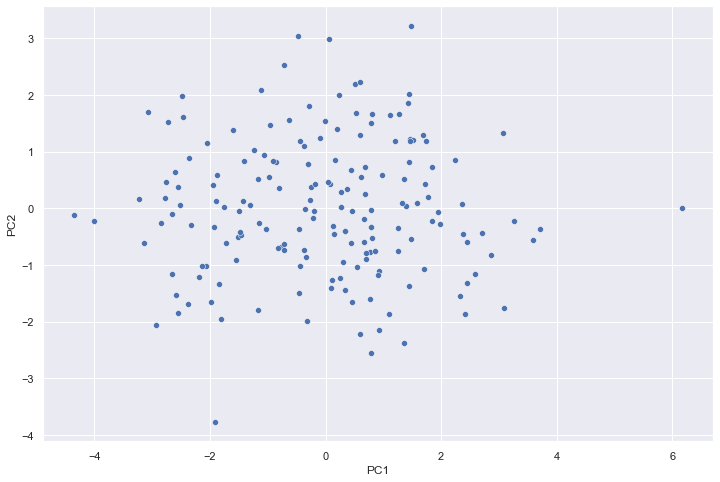

In [31]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

In [32]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(pcs_df2)

0.758837816340812

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [34]:
from sklearn.metrics import silhouette_score
dat3_1 = pcs_df2
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
sse_

[[2, 0.2631778236539813],
 [3, 0.19524559562327207],
 [4, 0.2065311298691861],
 [5, 0.20071052780620033],
 [6, 0.21157001438268283],
 [7, 0.2136934551409867],
 [8, 0.22468701106703426],
 [9, 0.21253382044578722]]

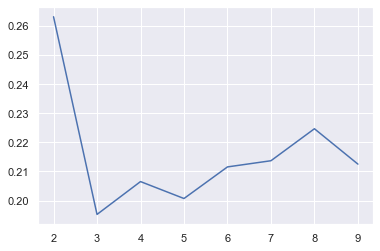

In [35]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [36]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)
ssd

[1272.9067007590652,
 947.2434414013017,
 825.0172268256299,
 732.0128893851424,
 669.5476914194506,
 615.4948381929852,
 576.7542355796427,
 550.5609974490849,
 515.3520741397083]

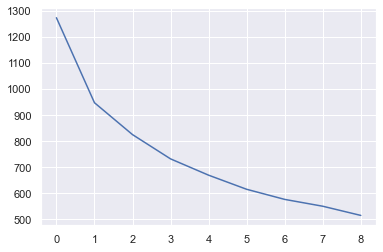

In [37]:
plt.plot(ssd)
plt.show()

In [38]:
ssd

[1272.9067007590652,
 947.2434414013017,
 825.0172268256299,
 732.0128893851424,
 669.5476914194506,
 615.4948381929852,
 576.7542355796427,
 550.5609974490849,
 515.3520741397083]

In [39]:
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [40]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,0.272965,0.013841,0.069570,-0.185358,0.018562,2
1,-2.187540,-1.215754,-1.383269,1.090716,0.004761,0
2,-1.232320,1.022464,-1.700251,0.288137,0.272923,0
3,1.471386,-0.545299,0.706724,0.810832,-1.198980,1
4,-1.490795,-0.042130,-1.367204,-1.257467,0.966261,0
...,...,...,...,...,...,...
202,0.272965,0.013841,0.069570,-0.185358,0.018562,2
203,0.272965,0.013841,0.069570,-0.185358,0.018562,2
204,0.910879,-1.180220,1.275550,0.853103,1.611130,2
205,-0.306170,0.787567,0.519327,-0.869260,-1.384673,3


In [41]:
dat_km['ClusterID'].value_counts()

2    86
0    54
3    42
1    25
Name: ClusterID, dtype: int64

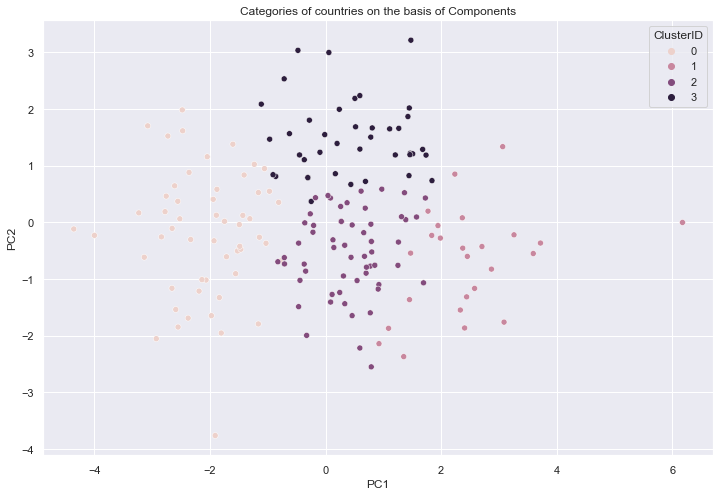

In [42]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [43]:
dat5=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat5.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality,PC1,PC2,PC3,PC4,PC5,ClusterID
0,139,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.272965,0.013841,0.069570,-0.185358,0.018562,2
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40,-2.187540,-1.215754,-1.383269,1.090716,0.004761,0
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08,-1.232320,1.022464,-1.700251,0.288137,0.272923,0
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25,1.471386,-0.545299,0.706724,0.810832,-1.198980,1
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02,-1.490795,-0.042130,-1.367204,-1.257467,0.966261,0


In [44]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country_id,hdi,unemployment,population,gdp,gni,inflation,infant_mortality,ClusterID
0,139,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,2
1,193,-0.40,-0.48,0.55,-0.31,-0.42,0.09,0.40,0
2,0,-0.63,-0.95,0.35,-0.09,-0.03,-0.40,0.08,0
3,96,0.34,0.48,0.68,0.03,0.12,0.00,0.25,1
4,148,-0.14,-0.92,-0.87,-0.14,-0.29,0.27,0.02,0


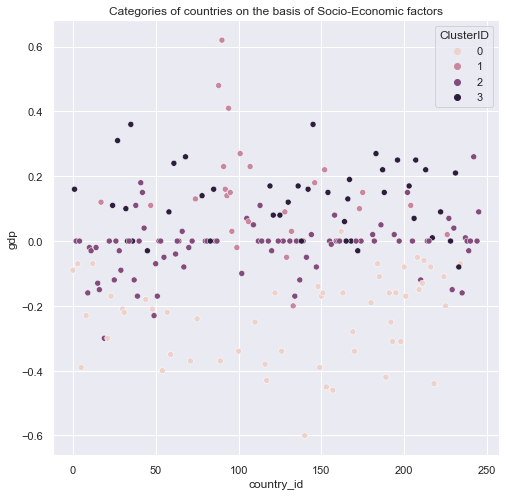

In [45]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x='country_id',y='gdp',hue='ClusterID',legend='full',data=dat6)

plt.title('Categories of countries on the basis of Socio-Economic factors')
plt.show()

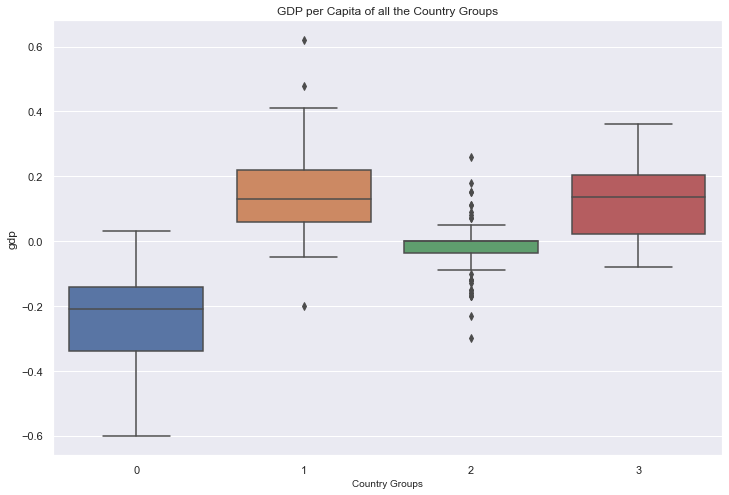

In [46]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdp',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

In [47]:
dat6.to_csv("data-clustering.csv",index=False)